In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# def extract_list_val(s):
#     for c in ['{''}''"']:
#         s=s.replace(c,'')
#     for c in ['/'':',' ','-','.','&',')','(','\'']:
#         s=s.replace(c,'_')
#     s=s.replace('matress','mattress')
#     return s.split(',')

listings = pd.read_csv("D:\CS 271\Project\listings_cleaned_two_lastminute_initial.csv")
listings = listings.replace(to_replace = 't',value = 1).replace(to_replace = 'f',value = 0)
listings = listings.fillna(1)

nan_rows = listings[listings['host_identity_verified'].isna()]
print(nan_rows)

X = listings.iloc[:,:12].values
y = listings.iloc[:,12].values

print(X)
encoder = LabelEncoder()
X[:,4] = encoder.fit_transform(X[:,4])
X[:,5] = encoder.fit_transform(X[:,5])
X[:,6] = encoder.fit_transform(X[:,6])
X[:,11] = encoder.fit_transform(X[:,11])
# pred_test = encoder.inverse_transform(X)
print("Encoded values")
print(X)
# onehotencoder = OneHotEncoder(categorical_features = [1])
# # Xt = X.reshape(-1,1)
# # print(Xt.shape)
# # print(X)
# Xt = onehotencoder.fit_transform(X).toarray()
# print(Xt)
# print(Xt.shape)

Empty DataFrame
Columns: [host_is_superhost, host_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, price, guests_included, number_of_reviews, instant_bookable, neighbourhood_group_cleansed, amenities]
Index: []
[[0 1 1 ... 1 1 'Pull-out Sofa']
 [0 1 1 ... 1 4 'Real Bed']
 [0 1 1 ... 1 1 'Real Bed']
 ...
 [0 0 1 ... 0 1 'Real Bed']
 [0 1 1 ... 1 1 'Real Bed']
 [0 1 1 ... 1 1 'Real Bed']]
Encoded values
[[0 1 1 ... 1 1 3]
 [0 1 1 ... 1 4 4]
 [0 1 1 ... 1 1 4]
 ...
 [0 0 1 ... 0 1 4]
 [0 1 1 ... 1 1 4]
 [0 1 1 ... 1 1 4]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print((x_train))
print(x_train.shape)
print(y_train.shape)

# xt = x_train.reshape(-1,1)
# yt = y_train.reshape(-1,1)

print(x_train.shape)
print(y_train.shape)
reg = LinearRegression()
reg.fit(x_train,y_train)

print(reg)

In [ ]:
# x_train = x_train.reshape(-1,1)
# y_train = y_train.reshape(-1,1)
# print(xscore)
print(x_train.shape)
print(y_train.shape)
pred = reg.predict(x_test)
print(pred)
# print(x_train)
# print(pred)

ValueError: shapes (16126,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)

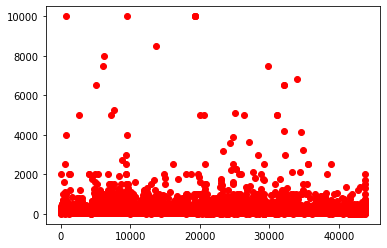

In [22]:
# print(len(xt))
# print(len(xscore))
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_test,reg.predict(x_test),color = 'blue')
plt.show()

In [14]:
ament = listings.iloc[:,7].values
ament
# ament.shape

array(['{"Cable_TV" Internet Wifi "Air_conditioning" Kitchen "Buzzer/wireless_intercom" Heating "Smoke_detector" "Carbon_monoxide_detector" "translation_missing:_en_hosting_amenity_49" "translation_missing:_en_hosting_amenity_50"}',
       '{TV "Cable_TV" Internet Wifi "Air_conditioning" Kitchen "Pets_allowed" "Free_street_parking" Heating "Family/kid_friendly" "Smoke_detector" "Carbon_monoxide_detector" "Fire_extinguisher" Essentials Shampoo "Lock_on_bedroom_door" "24_hour_check_in" Hangers "Hair_dryer" Iron "Laptop_friendly_workspace" "Self_check_in" Lockbox Bathtub "High_chair" "Stair_gates" "Children’s_books_and_toys" "Pack_’n_Play/travel_crib" "Hot_water" Microwave "Coffee_maker" Refrigerator "Dishes_and_silverware" "Cooking_basics" Oven Stove "Luggage_dropoff_allowed" "Long_term_stays_allowed"}',
       '{Internet Wifi "Air_conditioning" Kitchen Elevator "Free_street_parking" "Buzzer/wireless_intercom" Heating Washer Dryer "Smoke_detector" "Carbon_monoxide_detector" Essentials Sh

In [16]:
ament = ament.reshape(-1,1)
#encoded_ament = ament
ament[:,0] = encoder.fit_transform(ament[:,0])
#print(encoded_ament)
print(ament)

[[346]
 [7495]
 [3140]
 ...
 [39511]
 [36009]
 [33514]]


In [17]:
x_train,x_test,y_train,y_test = train_test_split(ament, y, test_size = 1/3, random_state = 0)


In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
y_pred = regressor.predict([[10889],[6075],[18002],[27255],[16096]])
# 10889
# 6075
# 18002
# 37023
# 27255
# 15388
# 16096
# 7287
# 40068
#  4944
#  9414
# 37347
#  6912
#  2760
# 37384
# 17611
# 15098
# 1777
y_pred
y_mean = np.mean(y_pred)
y_mean

152.8841140379783

In [13]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

NameError: name 'clf' is not defined